#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
##Reading the dataset into the notebook

In [ ]:
data=pd.read_excel('iris.xlsx')

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
##Checking for null values in the dataset

In [ ]:
data.isnull().sum()

 SL               0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
##Removing the null values in the SL,SW,PL columns

In [ ]:
for i in [' SL','PL','SW']:
  data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isnull().sum()  ##Removed all the null values

 SL               0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Checking for unique values

In [ ]:
data[' SL'].nunique()

35

In [ ]:
data['PL'].nunique()

44

In [ ]:
data['PW'].nunique()

22

In [ ]:
data['Classification'].nunique()

3

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder= preprocessing.LabelEncoder()

In [ ]:
data['Classification']= label_encoder.fit_transform(data['Classification'])

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [ ]:
data['Classification'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

In [ ]:
##Creating models

##Logistic Model

In [ ]:
##Testing and training

In [ ]:

y=data['Classification']
X=data.drop(('Classification'),axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

##Checking the accuracy of the model

In [ ]:
##Forming the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
##finding the precision score, recall score and f1 score

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [158]:
precision_score(y_test,y_pred,average='micro')

1.0

In [159]:
recall_score(y_test,y_pred,average ='micro')

1.0

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,y_pred,average='micro')

1.0

##kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k=[]
neighbors=range(3,18)

for k in neighbors: 
 classifier=KNeighborsClassifier(n_neighbors=k)
 classifier=classifier.fit(X_train,y_train)
 y_pred_kNN=classifier.predict(X_test)
 acc=accuracy_score(y_test,y_pred_kNN)
 metric_k.append(acc)

In [ ]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

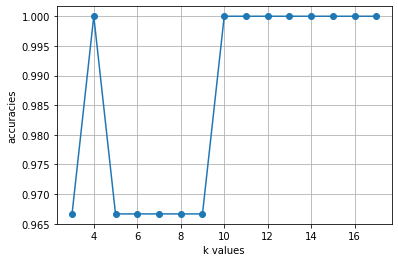

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_kNN)

0.9666666666666667

In [ ]:
precision_score(y_test,y_pred_kNN,average='micro')

0.9666666666666667

##Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier1=RandomForestClassifier(n_estimators=100)
classifier1=classifier1.fit(X_train,y_train)
y_pred_RF=classifier1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_RF)

1.0

In [ ]:
precision_score(y_test,y_pred_RF,average='micro')

1.0

##kNN model gave the best model. It gave the simplest model with less error.